In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

sepal_length  sepal_width  petal_lenght  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_lenght  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

sepal_length  sepal_width  petal_lenght  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_lenght    0
petal_width     0
species         0
dtype: int64

In [9]:
df.shape

(150, 5)

In [10]:
df.duplicated().sum()

3

In [11]:
df[df.duplicated()]

sepal_length  sepal_width  petal_lenght  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica

In [12]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

 # Explotary Data Analysis

<AxesSubplot:title={'center':'Species Count'}, xlabel='species', ylabel='count'>

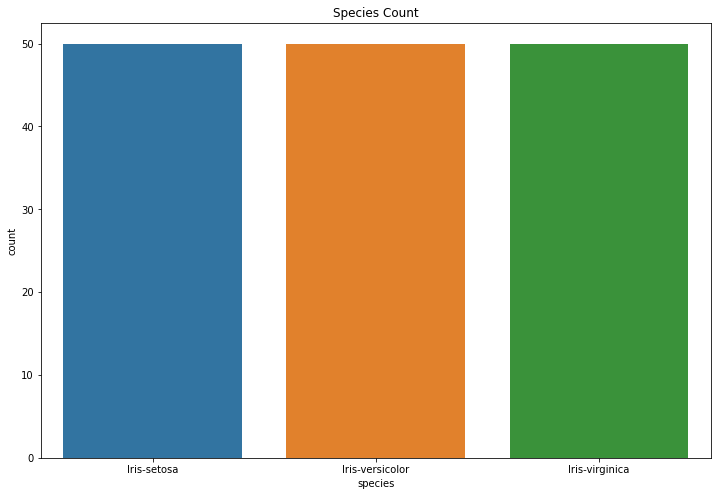

In [13]:
plt.figure(figsize=(12,8))
plt.title('Species Count')
sns.countplot(x='species',data=df)

<Figure size 864x576 with 0 Axes>

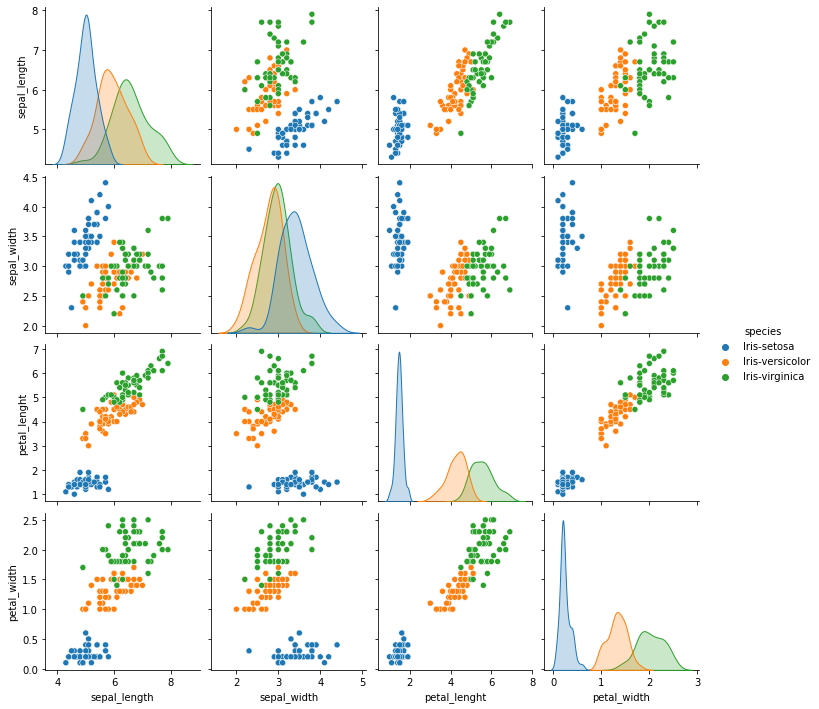

In [14]:
plt.figure(figsize=(12,8))
sns.pairplot(df,hue='species')

<AxesSubplot:>

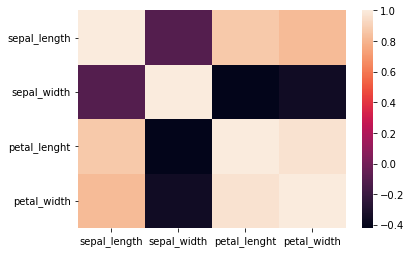

In [15]:
sns.heatmap(df.corr())

In [16]:
df.columns.unique()

Index(['sepal_length', 'sepal_width', 'petal_lenght', 'petal_width',
       'species'],
      dtype='object')

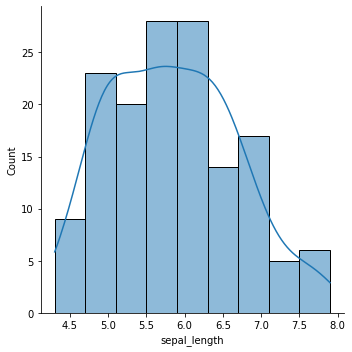

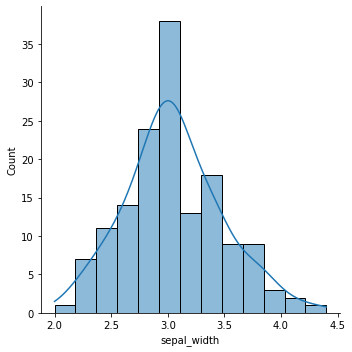

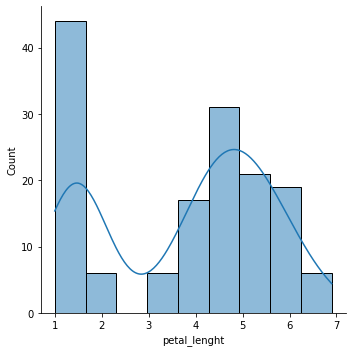

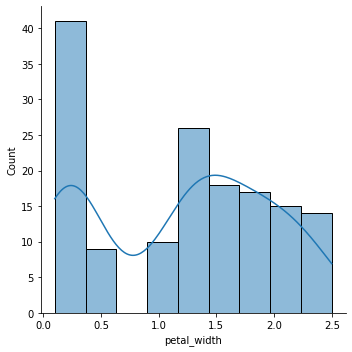

In [17]:
for column_name in df.columns.unique():
    if column_name != 'species':
        sns.displot(df[column_name], kde=True)

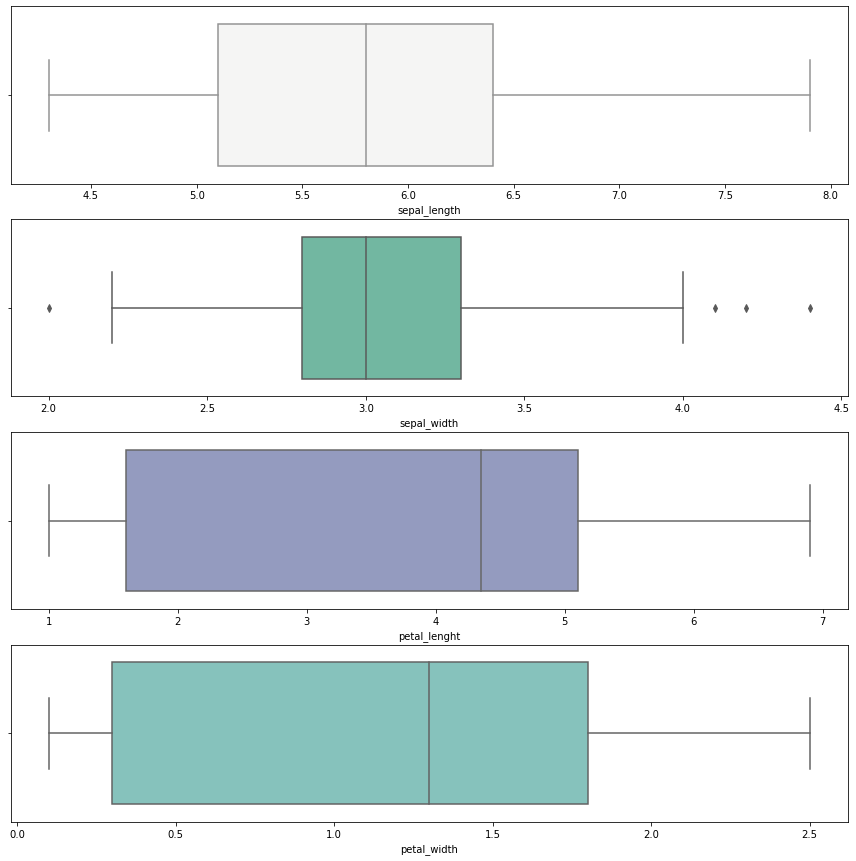

In [20]:
colors = ['BrBG_r', 'BuGn_r', 'BuPu_r', 'GnBu_r']
i = 0
f,axes = plt.subplots(4,figsize=(15,15))
for col,color in zip(df.columns.unique(),colors):
    if col != 'species':
        sns.boxplot(x=col, data=df, ax=axes[i], palette=color)
        i = i + 1

Boxplots dapat membantu kita dalam memahami karakteristik dari distribusi data. Selain untuk melihat derajat penyebaran data (yang dapat dilihat dari tinggi/panjang boxplot) juga dapat digunakan untuk menilai kesimetrisan sebaran data

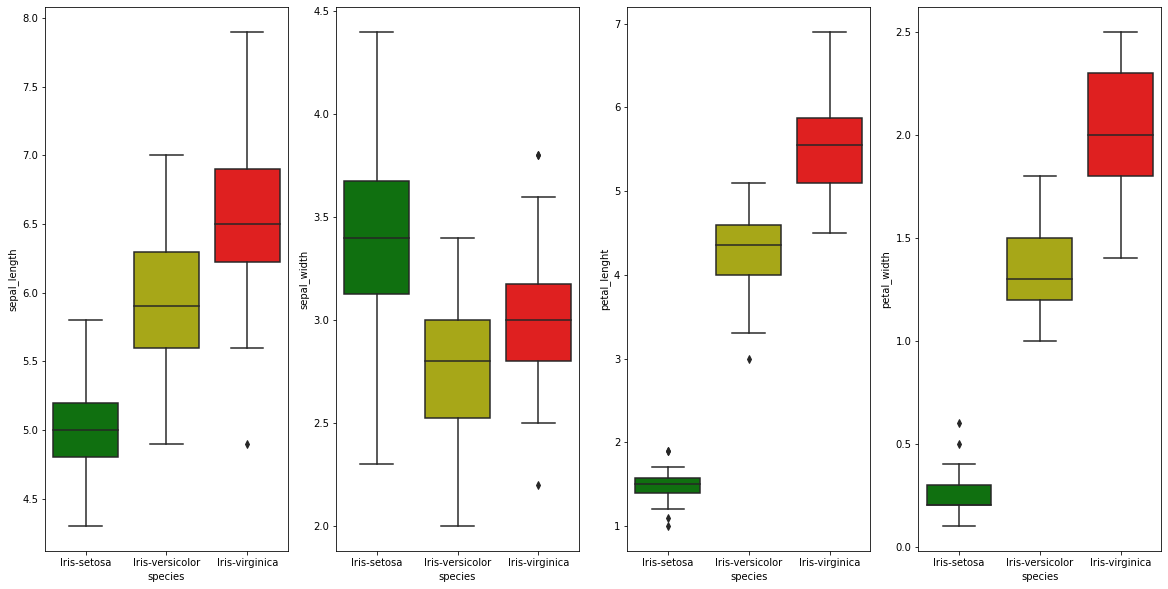

In [24]:
my_pal = {'Iris-versicolor': "y", 'Iris-setosa' : "g", 'Iris-virginica' : "r"}
i = 0
f,axes = plt.subplots(1,4,figsize=(20,10))
for col in df.columns.unique():
    if col != 'species':
        sns.boxplot(x='species', y=col, data=df, ax=axes[i], palette= my_pal)
        i = i + 1

In [30]:
setosa_df = df[df['species']=='Iris-setosa']
setosa_df['petal_lenght'].quantile(0.97)

1.806

In [31]:
setosa_df['petal_lenght'].quantile(0.03)

1.147

In [33]:
df[(df['species'] =='Iris-setosa')&(df['petal_lenght']>setosa_df['petal_lenght'].quantile(0.97))|( df['petal_lenght']<setosa_df['petal_lenght'].quantile(0.03)) ]

sepal_length  sepal_width  petal_lenght  petal_width      species
13           4.3          3.0           1.1          0.1  Iris-setosa
22           4.6          3.6           1.0          0.2  Iris-setosa
24           4.8          3.4           1.9          0.2  Iris-setosa
44           5.1          3.8           1.9          0.4  Iris-setosa

In [35]:
df.drop(index = [13,22,24,44]).head(15)

sepal_length  sepal_width  petal_lenght  petal_width      species
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa